In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

In [39]:
data = pd.read_csv('./weights_heights.csv', index_col='Index')
data.head(10)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
6,68.69784,123.3024
7,69.80204,141.4947
8,70.01472,136.4623
9,67.90265,112.3723


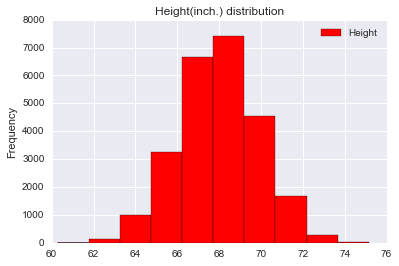

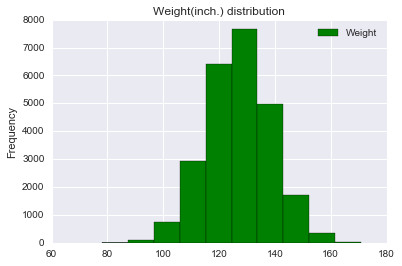

In [40]:
data.plot(y='Height', kind='hist', color='red', title='Height(inch.) distribution')
data.plot(y='Weight', kind='hist', color='green', title='Weight(inch.) distribution')

In [41]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2 

In [42]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis = 1)

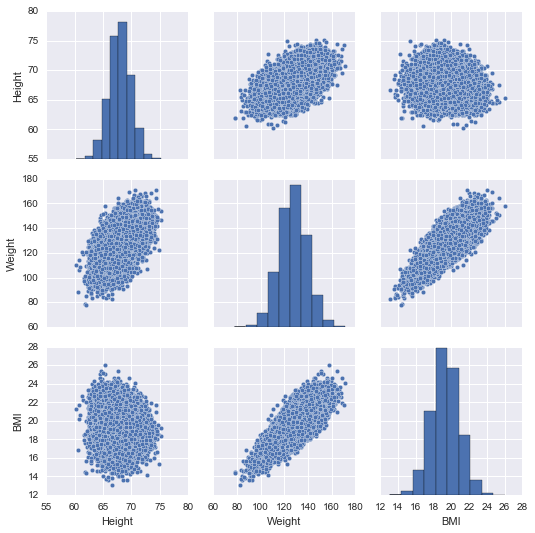

In [43]:
sns.pairplot(data)

In [44]:
def weight_category(weight):
    if weight < 120:
        return 1
    if weight > 150:
        return 3
    return 2
    

In [45]:
data['Weight_Cat'] = data['Weight'].apply(weight_category)


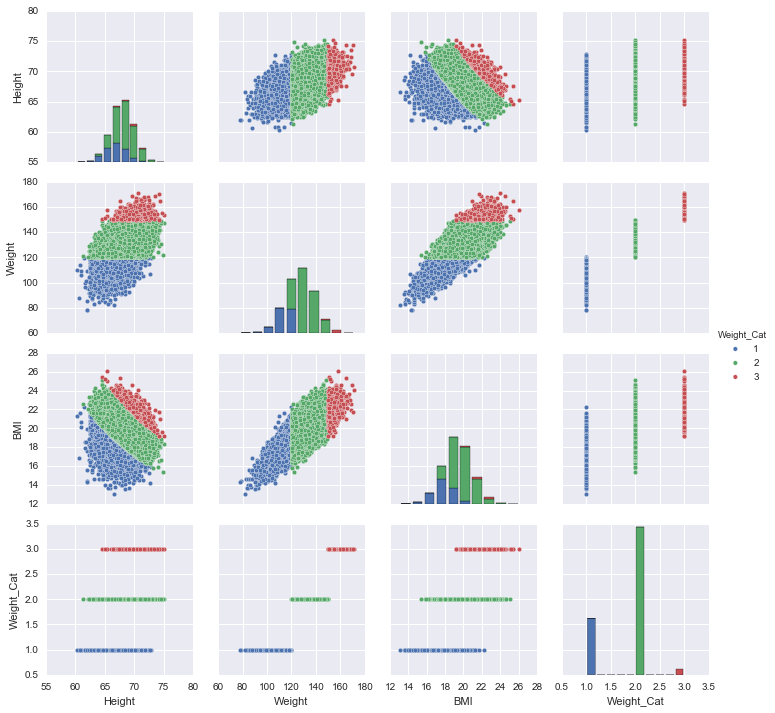

In [46]:
sns.pairplot(data, hue='Weight_Cat')

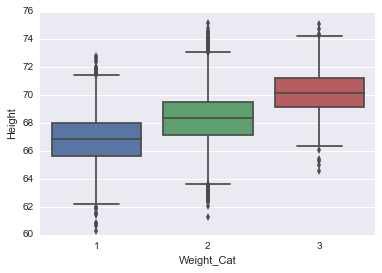

In [47]:
sns.boxplot(data.Weight_Cat, data.Height)

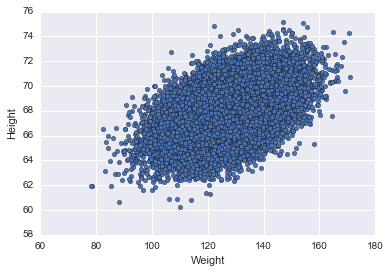

In [48]:
data.plot(x='Weight', y='Height', kind='scatter')

In [49]:
def error_func(data, w0, w1):
    one_error = lambda row: (row['Height'] - (w0 + w1 * row['Weight'])) ** 2
    errors = data.apply(one_error, axis=1)
    return sum(errors)
    

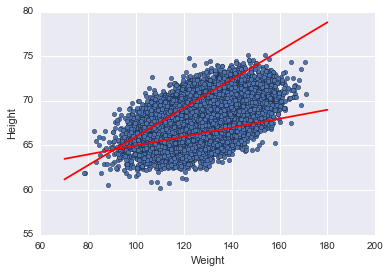

In [50]:
data.plot(x='Weight', y='Height', kind='scatter')
w = np.linspace(70, 180)
plt.plot(w, [60 + 0.05 * x for x in w], color='red')
plt.plot(w, [50 + 0.16 * x for x in w], color='red')

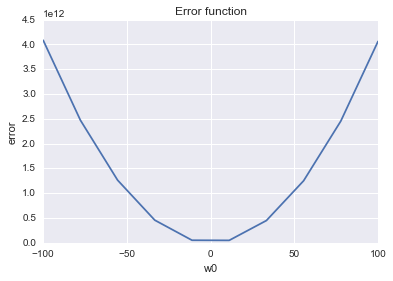

In [51]:
x = np.linspace(-100, 100, 10)
plt.plot(x, [error_func(data, 50, t) for t in x])
plt.title('Error function')
plt.xlabel('w0')
plt.ylabel('error')

In [52]:
res = sp.optimize.minimize_scalar(lambda x: error_func(data, 50, x), bounds=(-5, 5))

In [53]:
w1_opt = res.x
w1_opt

0.14109203728834385

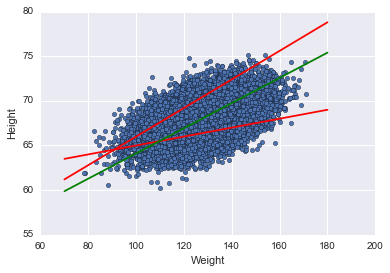

In [59]:
data.plot(x='Weight', y='Height', kind='scatter')
w = np.linspace(70, 180)
plt.plot(w, [60 + 0.05 * x for x in w], color='red')
plt.plot(w, [50 + 0.16 * x for x in w], color='red')
plt.plot(w, [50 + w1_opt * x for x in w], color='green')